In [45]:
import umap
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [46]:
import sys
sys.path.append('..')

Importing the data

In [47]:
sgss_children = pd.read_csv('Data/TTI_SGSS_AgeStratified/JaccardDistanceMatrixPopulationStatsOriginSGSSBelow18.csv')
sgss_adult = pd.read_csv('Data/TTI_SGSS_AgeStratified/JaccardDistanceMatrixPopulationStatsOriginSGSS18-54.csv')
sgss_elder = pd.read_csv('Data/TTI_SGSS_AgeStratified/JaccardDistanceMatrixPopulationStatsOriginSGSS55Plus.csv')

Name the first column as the symptom columnm.

In [48]:
sgss_children = sgss_children.rename({sgss_children.columns[0]: 'symptom'}, axis='columns')
sgss_adult = sgss_adult.rename({sgss_adult.columns[0]: 'symptom'}, axis='columns')
sgss_elder = sgss_elder.rename({sgss_elder.columns[0]: 'symptom'}, axis='columns')

Extract the jaccard distance matrices

In [49]:
sgss_children_jaccard = sgss_children.loc[:, sgss_children.columns != 'symptom'].values
sgss_adult_jaccard = sgss_adult.loc[:, sgss_adult.columns != 'symptom'].values
sgss_elder_jaccard = sgss_elder.loc[:, sgss_elder.columns != 'symptom'].values

Extract the symptom names

In [50]:
symptoms = sgss_children.loc[:, sgss_children.columns == 'symptom']

Specify a sequence of datasets, and then create a list of mappings between those datasets.

In [51]:
distance_matrix_list = [sgss_children_jaccard, sgss_adult_jaccard, sgss_elder_jaccard]
# create a relationship dictionary
relationship_dict = {i:i for i in range(symptoms.shape[0] - 1)}
n_slices = 3
relationships = [relationship_dict.copy() for i in range(n_slices - 1)]

Perform the alignment

## Loose embeddings alignment (focusses more on global structure and less on local structure)

In [52]:
aligned_mapper = umap.AlignedUMAP(
    n_neighbors=[4, 4, 4],
    min_dist = 0.001,
    n_components = 2,
    alignment_window_size=2,
    random_state = 42,
    alignment_regularisation=5e-3,
    metric='precomputed')

# perform the alignment
aligned_mapper.fit(distance_matrix_list, relations = relationships)

C:\Users\mfyles\Anaconda3\envs\aligned-umap\lib\site-packages\umap\umap_.py:1768: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
C:\Users\mfyles\Anaconda3\envs\aligned-umap\lib\site-packages\umap\umap_.py:1768: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
C:\Users\mfyles\Anaconda3\envs\aligned-umap\lib\site-packages\umap\umap_.py:1768: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")


AlignedUMAP(alignment_regularisation=0.005, alignment_window_size=2,
            metric='precomputed', min_dist=0.001, n_neighbors=[4, 4, 4],
            random_state=42)

In [53]:
# utility function to find create some useable axis
def axis_bounds(embedding):
    
    left, right = embedding.T[0].min(), embedding.T[0].max()
    bottom, top = embedding.T[1].min(), embedding.T[1].max()
    adj_h, adj_v = (right - left) * 0.1, (top - bottom) * 0.1
    return [left - adj_h, right + adj_h, bottom - adj_v, top + adj_v]

Quickly plot the output. We have more advanced plotting code in the R visualisation notebooks that plot points and labels using size and colour, etc.

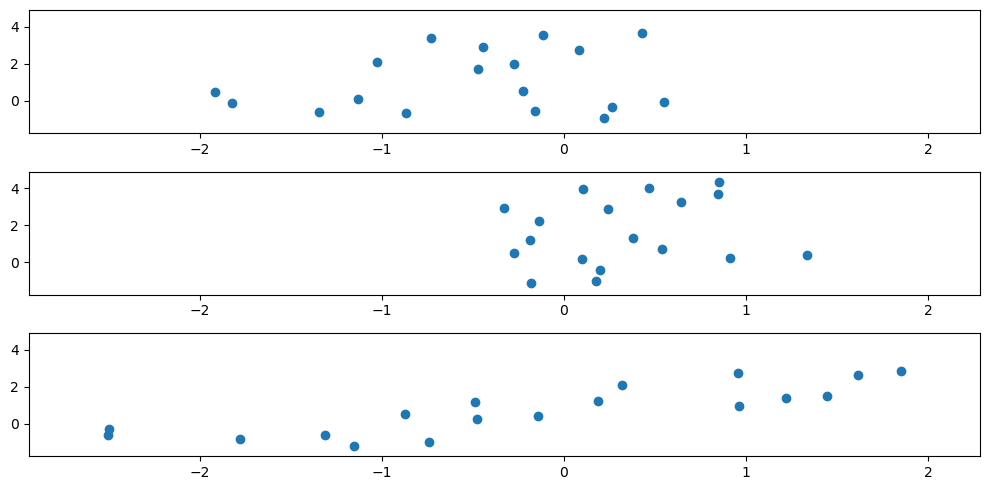

In [54]:
fig, axs = plt.subplots(3, 1, figsize=(10, 5))
ax_bound = axis_bounds(np.vstack(aligned_mapper.embeddings_))
for i, ax in enumerate(axs.flatten()):
    ax.scatter(*aligned_mapper.embeddings_[i].T)
    ax.axis(ax_bound)
plt.tight_layout()
plt.show()

In [55]:
# saving outputs
sgss_children_embedding = pd.DataFrame(aligned_mapper.embeddings_[0])
sgss_adult_embedding = pd.DataFrame(aligned_mapper.embeddings_[1])
sgss_elder_embedding = pd.DataFrame(aligned_mapper.embeddings_[2])

In [56]:
sgss_children_embedding['symptom_name_raw'] = symptoms['symptom']
sgss_adult_embedding['symptom_name_raw'] = symptoms['symptom']
sgss_elder_embedding['symptom_name_raw'] = symptoms['symptom']

In [57]:
sgss_children_embedding.to_csv('Data/Alignments/AlignedUMAP/SGSS/children_loose.csv')
sgss_adult_embedding.to_csv('Data/Alignments/AlignedUMAP/SGSS/adult_loose.csv')
sgss_elder_embedding.to_csv('Data/Alignments/AlignedUMAP/SGSS/elder_loose.csv')

## Tight embedding alignment (focusses less on global structure and more on local structure)

In [58]:
aligned_mapper = umap.AlignedUMAP(
    n_neighbors=[2, 2, 2],
    min_dist = 0.001,
    n_components = 2,
    alignment_window_size=2,
    random_state = 42,
    alignment_regularisation=5e-3,
    metric='precomputed')

# perform the alignment
aligned_mapper.fit(distance_matrix_list, relationss = relationships)

C:\Users\mfyles\Anaconda3\envs\aligned-umap\lib\site-packages\umap\umap_.py:1768: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
C:\Users\mfyles\Anaconda3\envs\aligned-umap\lib\site-packages\umap\umap_.py:1768: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
C:\Users\mfyles\Anaconda3\envs\aligned-umap\lib\site-packages\umap\umap_.py:1768: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")


AlignedUMAP(alignment_regularisation=0.005, alignment_window_size=2,
            metric='precomputed', min_dist=0.001, n_neighbors=[2, 2, 2],
            random_state=42)

In [59]:
# saving outputs
sgss_children_embedding = pd.DataFrame(aligned_mapper.embeddings_[0])
sgss_adult_embedding = pd.DataFrame(aligned_mapper.embeddings_[1])
sgss_elder_embedding = pd.DataFrame(aligned_mapper.embeddings_[2])

In [60]:
sgss_children_embedding['symptom_name_raw'] = symptoms['symptom']
sgss_adult_embedding['symptom_name_raw'] = symptoms['symptom']
sgss_elder_embedding['symptom_name_raw'] = symptoms['symptom']

In [61]:
sgss_children_embedding.to_csv('Data/Alignments/AlignedUMAP/SGSS/children_tight.csv')
sgss_adult_embedding.to_csv('Data/Alignments/AlignedUMAP/SGSS/adult_tight.csv')
sgss_elder_embedding.to_csv('Data/Alignments/AlignedUMAP/SGSS/elder_tight.csv')